# Linear Regression in python

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline
#这句话会让图片直接显示在这张纸上，而不是运行程序后才显示

## 1.Linear Regression with one vriable

In [126]:
data=np.loadtxt('ex1data1.txt',delimiter=',')
#将文件中的数据传递给data矩阵，分隔符号为逗号，data会被赋值为一个矩阵数组
m=data.shape[0]
#m=the number of examples
#shape函数返回的是一个元组，里面记录了data矩阵的每个维度的维数，例如data为3×2矩阵
#data.shape返回的就是(3，2)
x,y=np.hsplit(data,2)
#该语句意思为将data矩阵按横轴平均分隔为2个矩阵
print("the total number of the examples is {}".format(m))
print("x:        y:")
for i in range(m):
    print(x[i],y[i])

the total number of the examples is 97
x:        y:
[ 6.1101] [ 17.592]
[ 5.5277] [ 9.1302]
[ 8.5186] [ 13.662]
[ 7.0032] [ 11.854]
[ 5.8598] [ 6.8233]
[ 8.3829] [ 11.886]
[ 7.4764] [ 4.3483]
[ 8.5781] [ 12.]
[ 6.4862] [ 6.5987]
[ 5.0546] [ 3.8166]
[ 5.7107] [ 3.2522]
[ 14.164] [ 15.505]
[ 5.734] [ 3.1551]
[ 8.4084] [ 7.2258]
[ 5.6407] [ 0.71618]
[ 5.3794] [ 3.5129]
[ 6.3654] [ 5.3048]
[ 5.1301] [ 0.56077]
[ 6.4296] [ 3.6518]
[ 7.0708] [ 5.3893]
[ 6.1891] [ 3.1386]
[ 20.27] [ 21.767]
[ 5.4901] [ 4.263]
[ 6.3261] [ 5.1875]
[ 5.5649] [ 3.0825]
[ 18.945] [ 22.638]
[ 12.828] [ 13.501]
[ 10.957] [ 7.0467]
[ 13.176] [ 14.692]
[ 22.203] [ 24.147]
[ 5.2524] [-1.22]
[ 6.5894] [ 5.9966]
[ 9.2482] [ 12.134]
[ 5.8918] [ 1.8495]
[ 8.2111] [ 6.5426]
[ 7.9334] [ 4.5623]
[ 8.0959] [ 4.1164]
[ 5.6063] [ 3.3928]
[ 12.836] [ 10.117]
[ 6.3534] [ 5.4974]
[ 5.4069] [ 0.55657]
[ 6.8825] [ 3.9115]
[ 11.708] [ 5.3854]
[ 5.7737] [ 2.4406]
[ 7.8247] [ 6.7318]
[ 7.0931] [ 1.0463]
[ 5.0702] [ 5.1337]
[ 5.8014] [ 1

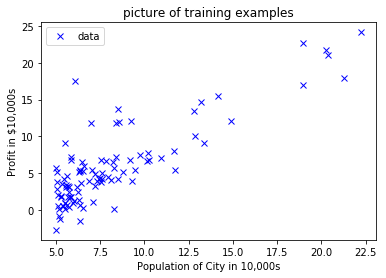

In [127]:
plt.plot(x,y,'bx',label="data")
plt.xlabel("Population of City in 10,000s")#set the x-axis label
plt.ylabel("Profit in $10,000s")#set the y-axis label
plt.title("picture of training examples")
plt.legend()#有了这个函数可以显示出来图片左上角那个框
plt.show()

In [129]:
theta0,theta1=0,0 #set two parameters
#定义一个求cost function的值的函数
def costfunction(x,y,theta0,theta1):
    m=x.shape[0] #set m=the number of examples
    sum=0
    for i in range(m):
        sum+=(theta0+theta1*x[i][0]-y[i][0])**2
    res=sum/(2*m)
    return res
#更新theta0和theta1的值的函数
def update(theta0,theta1,alpha,x,y):
    m=x.shape[0]
    sum0=0
    for i in range(m):
        sum0+=theta0+theta1*x[i]-y[i]
    tmp0=theta0-(alpha*sum0)/m
    sum1=0
    for i in range(m):
        sum1+=(theta0+theta1*x[i]-y[i])*x[i]
    tmp1=theta1-(alpha*sum1)/m
    return (tmp0,tmp1)

In [12]:
#set alpha
alpha=0.01
#set the numbers of iterations
iterations=2000
#set the two parameters
theta0,theta1=0,0 
Jtheta=costfunction(x,y,theta0,theta1)
for i in range(iterations):
    theta0,theta1=update(theta0,theta1,alpha,x,y)
    Jtheta=costfunction(x,y,theta0,theta1)
print(Jtheta,theta0,theta1)
#经过多次变换alpha和iterations的值，发现这两个值较为合适,alpha可以使J(theta)
#尽快收敛，又不会使其发散，并且经过2000次迭代后，J(theta)的值和theta0与theta1的值
#都基本不再变化，基本可以断定为收敛

[ 4.47802761] [-3.78806857] [ 1.18221277]


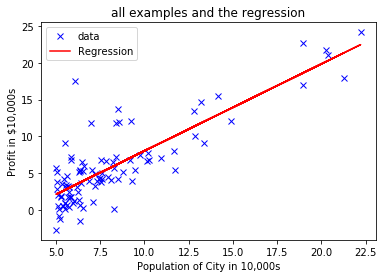

In [13]:
#define the function of linear regression
def hx(x):
    y=theta0+theta1*x
    return y
#print the picture
plt.plot(x,y,'bx',label="data") #画出所有点 bx 表示用蓝色标注点
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.plot(x,hx(x),'r-',label="Regression") #画出直线 r-表示用红色标注线
plt.legend()
plt.title("all examples and the regression")
plt.show()

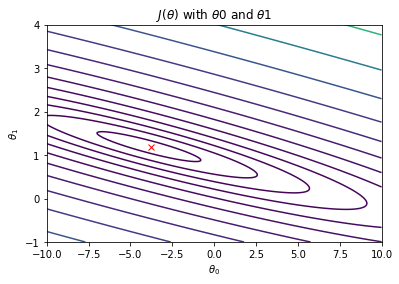

In [18]:
#生成一个contour figure，要按照以下过程来生成
theta0_grid=np.linspace(-10,10,200) #生成一个数组，在-10到10之间取200个数
theta1_grid=np.linspace(-1,4,200) #生成一个数组，在-1到4之间取200个数
J=np.zeros((theta0_grid.shape[0],theta1_grid.shape[0])) #建立J(theta)矩阵
for i in range(theta0_grid.shape[0]): #对J(theta)赋值
    for j in range(theta1_grid.shape[0]):
        J[i][j]=costfunction(x,y,theta0_grid[i],theta1_grid[j])
theta0_grid,theta1_grid=np.meshgrid(theta0_grid,theta1_grid) #生成网格
#接着套用等高线函数，第3个参数为J的转置矩阵，第四个参数为在10的-2次方到10的3此方
#内取20个数构成等比数列
plt.contour(theta0_grid,theta1_grid,J.T,levels=np.logspace(-2,10,20,base=2))
plt.plot(theta0, theta1, 'rx')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title(r"$J(\theta$) with $\theta 0$ and $\theta 1$")
plt.show()

## 2.Linear regression with multiple variables

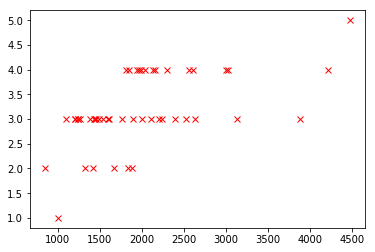

2


In [120]:
data=np.loadtxt('ex1data2.txt',delimiter=',') #load the data
#separate features and y
X,y=np.hsplit(data,np.array([2])) #split data after the second column
m=X.shape[0] # m represents the numbers of the examples
n=X.shape[1] # n represents the numbers of the variables
x1,x2=np.hsplit(X,2)
plt.plot(x1,x2,'rx')
plt.show()
print(n)
#the main purpose of the picture is to see the range of x1 and x2 to do the feature scaling

the minimum value of x1 is 852.0
the maximum value of x1 is4478.0
the minimum value of x2 is 1.0
the maximum value of x2 is 5.0


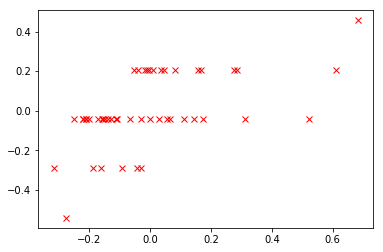

In [121]:
#feature scaling:I will use the method:x'=(x-average)/max-min
sum1,sum2=0,0
for i in range(m):
    sum1+=x1[i][0]
    sum2+=x2[i][0]
#calculate the average value of x1 and x2,use the flowing function
average1=x1.mean()
average2=x2.mean()
#using the flowing function to calculate the maximum ande the minimun of x1 and x2
min1,max1=x1.min(),x1.max()
min2,max2=x2.min(),x2.max()
print("the minimum value of x1 is {}\nthe maximum value of x1 is{}\nthe minimum value of x2 is {}\
\nthe maximum value of x2 is {}".format(min1,max1,min2,max2))
range1=max1-min1
range2=max2-min2
for i in range(m):
    for j in range(2):
        if j==0:X[i][j]=(X[i][j]-average1)/range1
        elif j==1:X[i][j]=(X[i][j]-average2)/range2
x1,x2=np.hsplit(X,2)
plt.plot(x1,x2,'rx')
plt.show()
#now after feature scaling,let's see the range of x1 and x2
#their similar range is good for the speed of gradient descent

In [122]:
X=np.mat(X) #convert the array to the matrix
x0=np.ones((m,1))
x0=np.mat(x0)
X=np.hstack((x0,X)) #the vector X include x0,in all examples,x0=1
y=np.mat(y)
theta=np.zeros((n+1,1)) #initialize the vector theta
theta=np.mat(theta)
#define the costfunction and the rules of update of vector theta
def CostFunction(X,y,theta):
    res=float(((X*theta-y).T)*(X*theta-y)/(2*m))
    return res
def Update(X,y,theta,alpha):
    tmp_theta=np.zeros((n+1,1))
    tmp_theta=theta-(alpha/m)*((X.T)*(X*theta-y))
    tmp_theta=np.mat(tmp_theta)
    return tmp_theta

In [123]:
alpha=1 #initialize the alpha
iterations=3000 #initialize the iterations
for i in range(iterations):
    theta=Update(X,y,theta,alpha)
    J_theta=CostFunction(X,y,theta)
print(theta,J_theta)

[[ 340412.65957447]
 [ 504777.90398791]
 [ -34952.07644931]] 2043280050.6028283
